# Importing libraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import  classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from scipy.stats import uniform

# Loading dataset

In [30]:
train = pd.read_csv("datasets/train.csv")
test = pd.read_csv("datasets/test.csv")

In [31]:
X_train, y_train =  train.drop(["Depression"], axis=1), train["Depression"]
X_test, y_test =  test.drop(["Depression"], axis=1), test["Depression"]

# Model training

In [32]:
nb = GaussianNB()

In [33]:
param_grid = {
    # 'var_smoothing': uniform(1e-10, 1e-1)  # Smoothing parameter range
}

In [34]:
grid_search = RandomizedSearchCV(estimator=nb, param_distributions=param_grid,  scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

In [35]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\smend\miniconda3\envs\stevens\Lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
                   param_distributions={}, scoring='accuracy', verbose=2)

# Model Evaluation

In [36]:
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validated Accuracy: {grid_search.best_score_}")

Best Parameters: {}
Best Cross-Validated Accuracy: 0.8408335182882516


In [37]:
# Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      2320
           1       0.86      0.88      0.87      3247

    accuracy                           0.85      5567
   macro avg       0.84      0.84      0.84      5567
weighted avg       0.84      0.85      0.85      5567



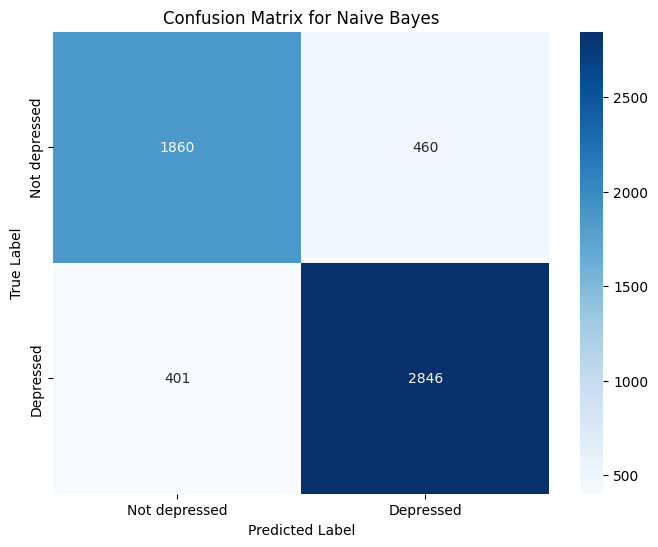

In [38]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not depressed", "Depressed"],
            yticklabels=["Not depressed", "Depressed"])
plt.title("Confusion Matrix for Naive Bayes")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Feature importance

In [ ]:
# # Compute a feature importance score
# feature_importance = np.abs((best_model.theta_[1] - best_model.theta_[0]) / np.sqrt(best_model.sigma_[0] + best_model.sigma_[1]))

# # Normalize to sum to 1 (optional)
# feature_importance /= feature_importance.sum()

# # Print feature importance
# print("Feature Importance:")
# for i, score in enumerate(feature_importance):
#     print(f"Feature {i + 1}: {score:.4f}")

AttributeError: 'GaussianNB' object has no attribute 'sigma_'